In [1]:
import zipfile
import os


In [2]:
zip_file_path = 'Dataset Brain Tumor.zip'  # Replace with your file's name
extract_dir = 'Dataset Brain Tumor'  # Replace with the desired extraction directory


In [3]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [4]:
extracted_files = os.listdir(extract_dir)
print(extracted_files)

['Dataset Brain Tumor']


In [2]:
# Set paths
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = 'Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset'
test_dir = 'Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset'

# Define image size and batch size
image_size = (240, 240)
batch_size = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Testing data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.


In [5]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
def create_cnn_model_with_relu_l2(input_shape):
    model = models.Sequential()

    # Convolutional Layer 1 with L2 Regularization
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2 with L2 Regularization
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3 with L2 Regularization
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer with ReLU Activation and L2 Regularization
    model.add(layers.Dense(128, activation='relu'))

    # Output Layer with Softmax Activation
    model.add(layers.Dense(4, activation='softmax'))

    return model

# Input shape
input_shape = (240, 240, 3)  # Assuming RGB images

# Create the model
model_relu_l2 = create_cnn_model_with_relu_l2(input_shape)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_relu_l2.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model summary
model_relu_l2.summary()

# Fit the model (make sure train_generator and test_generator are defined)
history = model_relu_l2.fit(
    train_generator,
    epochs=50,  # Adjust based on your needs
    validation_data=test_generator
    #callbacks=[early_stopping]
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,948 (49.36 MB)

 Trainable params: 12,938,948 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 88s 457ms/step - accuracy: 0.4225 - loss: 1.3662 - val_accuracy: 0.6112 - val_loss: 1.0262
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 442ms/step - accuracy: 0.6775 - loss: 0.8042 - val_accuracy: 0.7070 - val_loss: 0.7986
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 405ms/step - accuracy: 0.7149 - loss: 0.7031 - val_accuracy: 0.6889 - val_loss: 0.7984
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 73s 391ms/step - accuracy: 0.7377 - loss: 0.6444 - val_accuracy: 0.6426 - val_loss: 1.0037
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 404ms/step - accuracy: 0.7562 - loss: 0.6068 - val_accuracy: 0.6905 - val_loss: 0.8054
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 390ms/step - accuracy: 0.7720 - loss: 0.5701 - val_accuracy: 0.7408 - val_loss: 0.6797
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 366ms/step - accuracy: 0.7719 - loss: 0.5706 - val_accuracy: 0.7172 - val_loss: 0.7343
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 430ms/step - accuracy: 0.8057 - loss: 0

179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 423ms/step - accuracy: 0.9274 - loss: 0.1905 - val_accuracy: 0.8971 - val_loss: 0.2702


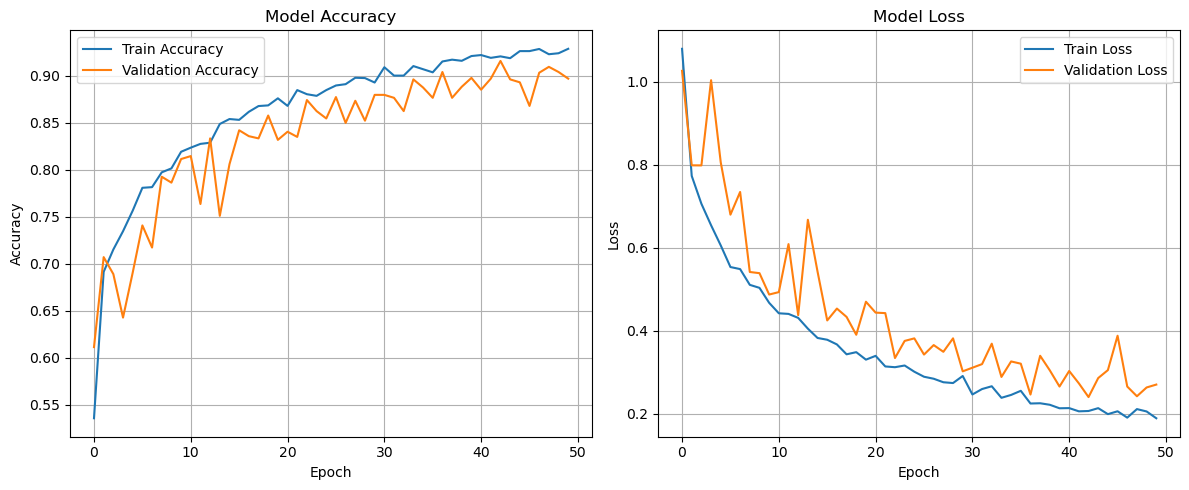

In [6]:
import matplotlib.pyplot as plt

# Assuming you have saved the history of your training process in a variable named 'history'
# Example:
# history = model.fit(...)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
